## Bike sharing dataset analysis

I am writing the explorative analysis of the dataset using a series of Python (ver.2.7.11) packages that facilitate the access to the data as well as the statistical analysis. In particular, I am using Panda (ver.0.17), scikit-learn (ver.0.17) together with the more common numerical packages available for Python such as numpy and matplotlib. I am also using jupyter notebooks for this type of quick data analysis. I usually save everything into a normal python script after I streamline the major features of the predictive model.

In [1]:
#Import the necessary packages for the analysis 
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
# Enable inline plotting
%matplotlib inline
from IPython.display import Math

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
#I prefer the simple formula notation (less confusing)
import statsmodels.formula.api as sm

In [2]:
#Simply replace the directory name where your data are stored
Directory = r'./'
hourFile = pd.read_csv(Directory+'hour.csv')
dayFile  = pd.read_csv(Directory+'day.csv')

In [3]:
#Check for missing data (The description of the dataset states that there are no missing data but better check)
hourFile.isnull().values.sum() 

0

In [4]:
#Check for missing data on the other dataset
dayFile.isnull().values.sum()

0

In [5]:
#Quick look at the dataset
hourFile.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
dayFile.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
#The total number of bikes rented during the two years of the survey
totalRentedBikes = dayFile['cnt'].sum()
pregRentedBikes = dayFile['registered'].sum()*100./totalRentedBikes
pcasRentedBikes = dayFile['casual'].sum()*100./totalRentedBikes
print ("Registered %%: %f , casual %% %f, total %d" % (pregRentedBikes, pcasRentedBikes, totalRentedBikes))

Registered %: 81.169832 , casual % 18.830168, total 3292679


I noticed that all the variables in the csv file are read either as integer or float (with the exeption of *dteday*). Some of them should be considered as categories given the limited number of possible values that they can assume. In particular the following ones:

In [8]:
hourFile.season     = hourFile.season.astype('category')
hourFile.weathersit = hourFile.weathersit.astype('category')
hourFile.holiday    = hourFile.holiday.astype('category')
hourFile.workingday = hourFile.workingday.astype('category')
hourFile.weekday    = hourFile.weekday.astype('category')

In [9]:
#I convert dteday to timestamps for later use in the analysis
hourFile.dteday = pd.to_datetime(hourFile.dteday);
dayFile.dteday  = pd.to_datetime(dayFile.dteday);

In [10]:
#As recommended in the description of the exercise I split the dataset in a training set randomly sampled
#and the remaining 10% will be used to test my prediction model.
train = hourFile.sample(frac=0.9)
test  = hourFile.drop(train.index)

For an eagle-eye view on the dataset, given also the limited size of it and the limited numbers of variables, I can look at a simple scatter plot. If the dataset was bigger or the number of attribute larger I would have reduced the size of it by sllicing it in smaller chunks.

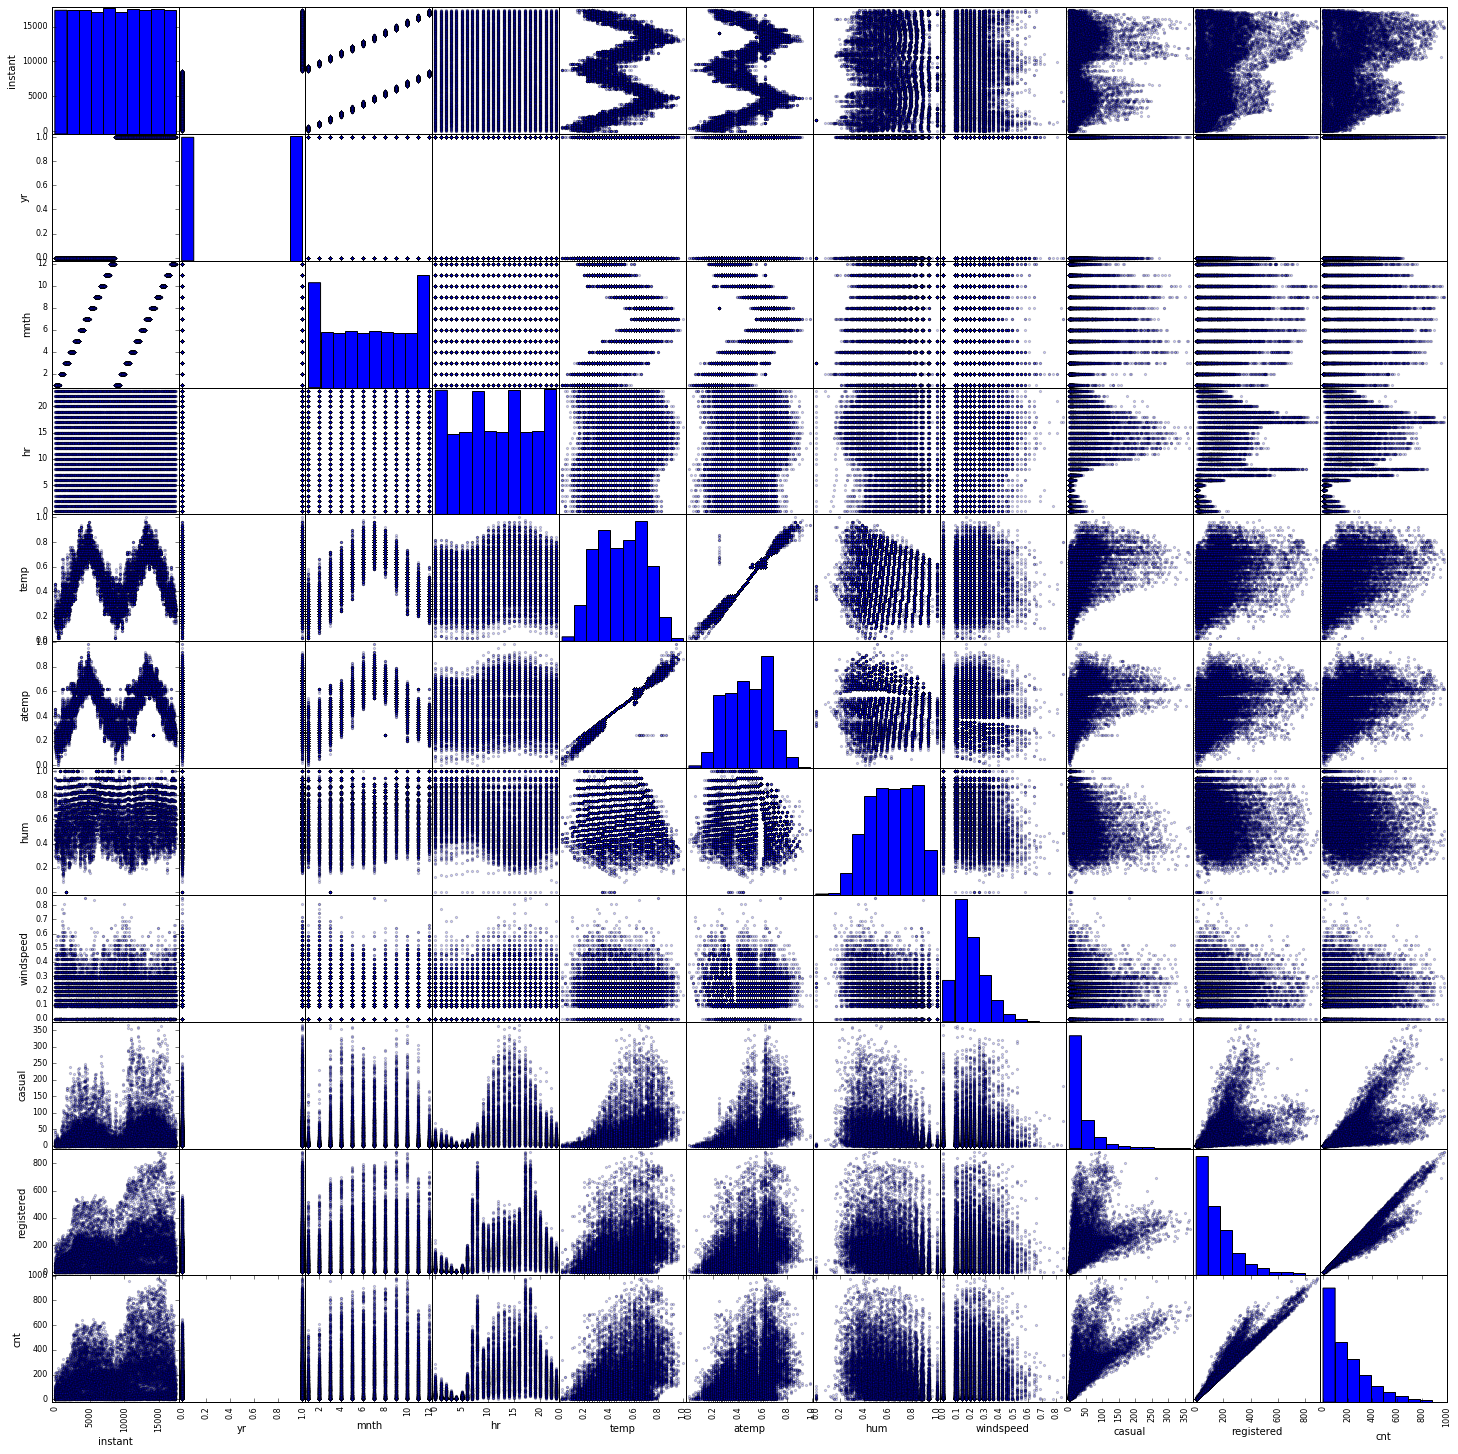

In [11]:
pd.scatter_matrix(train, alpha=0.2, figsize=(25, 25), diagonal='hist');

A series of interesting features of the dataset become visible immediately:
* the variables *atemp* and *temp* are strongly correlated, as expected. Given that *atemp* should give a more truthful representation of the temperature I could, in principle, discard *temp* for the analysis.
* From these plots we can also compare the distribution of *registered* and *casual* users with the total number of rented bikes *cbn*. It is easy to see a distinct pattern in the two classes of users regarding the prefered renting time of day. 


## Different user classes

I want to have a look now at the most obvious class split in the dataset: *registered* and *casual*. In particular I am interested in the distribution w.r.t. the hour in the day.

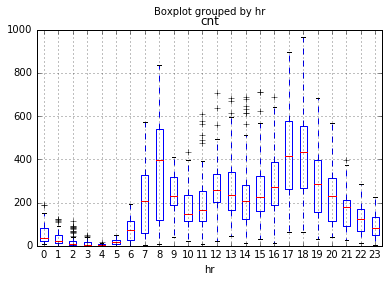

In [12]:
#I plot now the boxplots of *cnt* grouped by *hr*
test.boxplot(column='cnt', by = 'hr');

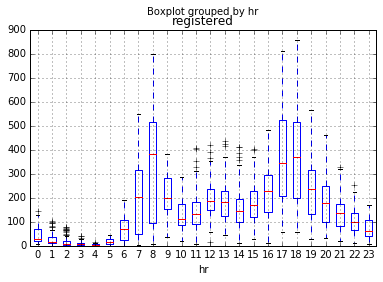

In [13]:
#I plot now the boxplots of *registered* grouped by *hr*
test.boxplot(column='registered', by = 'hr');

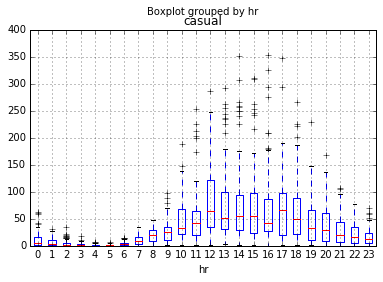

In [14]:
#I plot now the boxplots of *casual* grouped by *hr*
test.boxplot(column='casual', by = 'hr');

As supected, the *registered* users, which account for most of the rented bikes (80%), have two distinct peaks in the time distribution. The two peaks correspond to the morning (from 6:00 till 10:00) rush hours and to evening ones (16:00-20:00). The distribution for the *casual* users does not show this behavior making me think that we could split the training set in two distinct classes and obtain a better fit with the prediction model. When I will later build the predition model I do expect to see that the *hr* variable is one of the most important for the regression.

## Weather, temperature and seasonal changes

Weather conditions such as temperature, wind and in particular rain or even snow could potentially have a large influence on the prediction. In the previous section I noticed how the majority of *registered* users rent a bike during the rush hours most likely to avoid the car traffic in the city and quickly reaching the place of work or study. For this reason we might expect a smaller variation of number of rented bikes despite adverse weather conditions, given that most of the users are commuters.

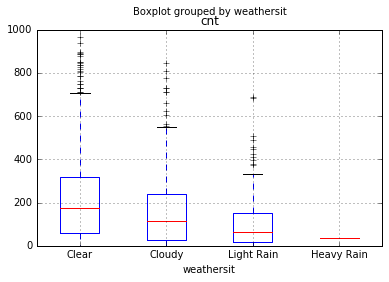

In [15]:
bp = test.boxplot(column='cnt', by = 'weathersit')
bp.set_xticklabels(['Clear', 'Cloudy', 'Light Rain', 'Heavy Rain']);

As expected, people do not like to cycle in the rain so the sunny days are still in front when comes to rent a bike.

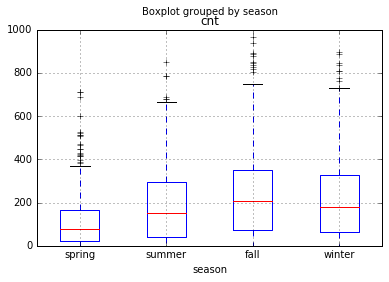

In [16]:
bp = test.boxplot(column='cnt', by = 'season')
bp.set_xticklabels(['spring','summer', 'fall', 'winter']);

Interestingly spring has the lowest number of rented bikes despite beeing not so rainy as we can see in the following plots where I have plotted the different types of users versus the possible combinations of weather conditions and season. We can also notice that the number of casual users significantly decreases in winter especially with adverse weather conditions. 

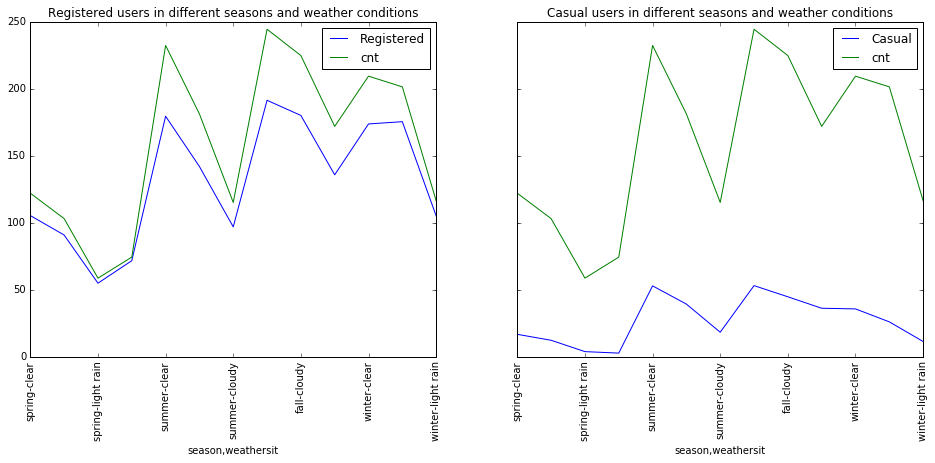

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
wday_by_hour = hourFile.groupby(['season', 'weathersit'])['cnt'].mean()
wday_by_hour_reg = hourFile.groupby(['season', 'weathersit'])['registered'].mean()
wday_by_hour_cas = hourFile.groupby(['season', 'weathersit'])['casual'].mean()
wday_by_hour_reg.plot(ax=ax[0]);
wday_by_hour_cas.plot(ax=ax[1]);
wday_by_hour.plot(title='Registered users in different seasons and weather conditions', ax=ax[0]);
wday_by_hour.plot(title='Casual users in different seasons and weather conditions', ax=ax[1]);
for axi in ax:
    axi.set_xticklabels(['spring-clear','spring-light rain', 'summer-clear', 'summer-cloudy', 
                         'fall-cloudy', 'winter-clear', 'winter-light rain'],rotation='vertical');

ax[0].legend(['Registered', 'cnt']);
ax[1].legend(['Casual', 'cnt']);


Another interesting factor is the temperature or better the normalized feeling temperature (*atemp*). In the following plots we can see the distribution of *cnt* versus the apparent temperature.

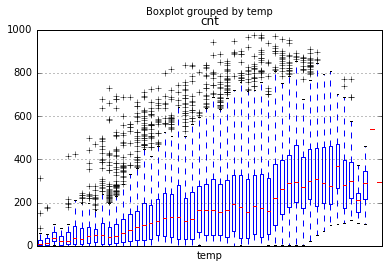

In [18]:
bp = hourFile.boxplot(column='cnt', by = 'temp');
bp.set_xticks([]); #For some reason I have a problem with the postion of the ticks on the boxplot.

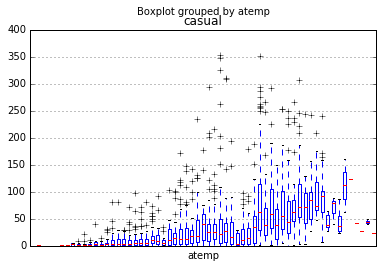

In [19]:
bp = test.boxplot(column='casual', by = 'atemp');
bp.set_xticks([]);

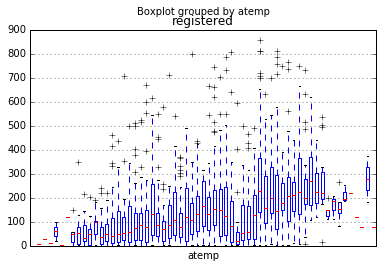

In [20]:
bp = test.boxplot(column='registered', by = 'atemp');
bp.set_xticks([]);

Given the strong correlation between the apparent temperature and the number or rented bikes, it is worth to attemp a simple linear regression model.

In [21]:
# Let's just create a simple fit model using just the apparent temperature (which would be my zero order guess) 
lm = sm.ols(formula='cnt ~ atemp', data=hourFile).fit()

# print the coefficients
#lm.params

In [22]:
# I need a DataFrame with the minimum and maximum values of temperature
X_new = pd.DataFrame({'atemp': [hourFile.temp.min(), hourFile.temp.max()]})
# make predictions for those x values and store them
preds = lm.predict(X_new)

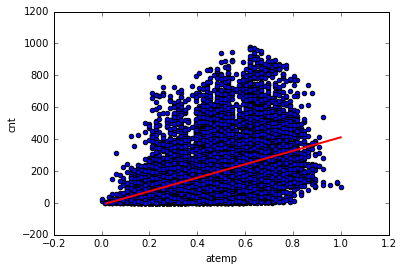

In [23]:
hourFile.plot(kind='scatter', x='atemp', y='cnt')
# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2);

## Prediction model using random forest

I have decided to use random forest for my predictive model for four reasons:
* it is really good at estimating the importance of the single variables in the prediction model
* it is fast and it allows me to get at least a benchmark in a very short time. I can then spend more time later to refine the model if needed.
* it is one of the few algorithms that I have used before with success for digging out the parameters of a gravitational wave signal from the coalescence of binary neutron star system from the mock signal of a detector.
* it is well documented and there is a very good resource online in the website of the creators of the method, Breiman and Cutler (www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm).

In [24]:
#I remove the field called *instant* in the first analysis attempt since I am not sure how relevant it is.
train.pop("instant");
test.pop("instant");

In [25]:
#I split the dataset in features, X, and labels y as well as in registered and causal users
X = train
y = X.pop("cnt")
y_cas = X.pop("casual")
y_reg = X.pop("registered")

In [26]:
# I remove for now the date from the dataset. I will think later how to analyse it 
all_vars = list(train.dtypes[train.dtypes != "datetime64[ns]"].index)

I initialize the random forest model with 100 trees. I have played with the number of trees up to 1000 and I do not see improvements in the model. I set *random_state=99* so that it is possible to recreate exactly the results that I show here. I use out-of-bag (OOB) error to have an estimate of the error in the model.  The OOB error is the average error for each tree constructed from a bootstrap samples of the training dataset.

In [27]:
rfr_mod = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=99, n_jobs=-1)

In [28]:
X[all_vars].head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
1268,1,0,2,0,0,6,0,1,0.24,0.2273,0.52,0.1940
7602,4,0,11,9,0,5,1,1,0.26,0.2576,0.41,0.1940
11887,2,1,5,12,0,2,1,1,0.64,0.6061,0.73,0.1940
11486,2,1,4,19,0,6,0,3,0.36,0.3485,0.71,0.1343
3238,2,0,5,20,0,4,1,1,0.54,0.5152,0.77,0.2836


In [29]:
%%timeit
rfr_mod.fit(X[all_vars],y)

1 loop, best of 3: 1.09 s per loop


## Regression results and feature importance

I estimate the out-of-bag error for the random forest algorithm applied to the dataset. The result looks promising even though I did not discard any of the variables. 

In [30]:
err = 1. - rfr_mod.oob_score_
print err

0.0553114747727


We can now analyse the importance of each variable. As expected according to the preliminary analysis, the hour at wich the bikes are rented plays the most important role. Second comes the temperature wich also has a strong influence on the results.

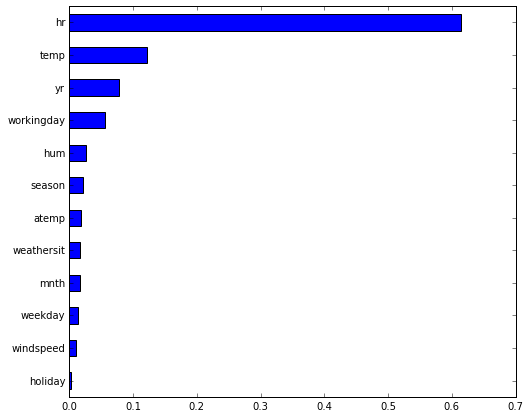

In [31]:
features_importance = pd.Series(rfr_mod.feature_importances_, index=all_vars)
features_importance.sort_values(inplace=True)
features_importance.plot(kind="barh", figsize=(8,7));

I calculate the *mean absolute error* using the following formula
\begin{align}
\rm{MAE} = \frac{1}{n} \sum_{i=1}^n \bigg| \rm{prediction}_i - \rm{truth}_i \bigg|
\end{align}

In [32]:
def mean_absolute_error(y_true, y_pred): 
    return np.sum(np.absolute(y_pred - y_true))/y_pred.shape[0]

In [33]:
y_pred = rfr_mod.predict(X[all_vars])
mean_absolute_error(y, y_pred)

9.371821199472658

In [34]:
#I compute the coefficient of determination usually denoted as R^2
rfr_mod.score(X[all_vars],y)

0.99237040129006837

I will now test the hypothesis that by splitting the users in the two categories *registered* and *casual*, it is possible to obtain better performance of the prediction model.

In [35]:
rfr_reg = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=99, n_jobs=-1)

In [36]:
rfr_cas = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=99, n_jobs=-1)

In [37]:
%%timeit
rfr_reg.fit(X[all_vars],y_reg)

1 loop, best of 3: 1.06 s per loop


In [38]:
y_pred_reg = rfr_reg.predict(X[all_vars])
mean_absolute_error(y_reg, y_pred_reg)

7.3966312393252185

In [39]:
err = 1. - rfr_reg.oob_score_
print err

0.0533886460683


In [40]:
%%timeit
rfr_cas.fit(X[all_vars],y_cas)

1 loop, best of 3: 1.07 s per loop


In [41]:
y_pred_cas = rfr_cas.predict(X[all_vars])
mean_absolute_error(y_cas, y_pred_cas)

3.1229487336396073

In [42]:
err = 1. - rfr_cas.oob_score_
print err

0.0871514034666


We can see that by dividing the users into the two classes the mean absolute error decreases further.

## Results on the test dataset

I now apply the model to the test dataset (10% of all data) that I selected at the beginning and I can see if the model is robust and can accurately predict the value of *cnt*.

In [43]:
X_test = test
y_test = X_test.pop("cnt")

In [44]:
y_test_pred = rfr_mod.predict(X_test[all_vars])

The error on the test dataset is significantly larger than on the training one, this could be caused by overfitting the training data. Selecting the variables for the fir more accurately could result in an improvement of the model.

In [45]:
mean_absolute_error(y_test, y_test_pred) #For the complete set of users 

25.418131568853088

In [46]:
y_test_reg = X_test.pop("registered")
y_test_cas = X_test.pop("casual")

In [47]:
y_test_reg_pred = rfr_reg.predict(X_test[all_vars])
y_test_cas_pred = rfr_cas.predict(X_test[all_vars])

When I compute the MAE for the two different classes of users on the test set I do not see the improvment of seen when we split trained the model on the training set. This could be again a symptom of overfitting the model to the training data causing the drop in performance on the test set.

In [48]:
mean_absolute_error(y_test_reg, y_test_reg_pred) #Considering only the registered users

20.516647460134735

In [49]:
mean_absolute_error(y_test_cas, y_test_cas_pred) #Considering only the casual users

8.69967721518988

Overall the model does quite a good job especially considering that it requires almost no tuning and it allowed me to get a reasonable result without the need of feature selection.